In [82]:
import pandas as pd
sns.set()

In [5]:
oc=pd.read_csv('occupancy.csv')

In [6]:
oc.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
oc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
date             2664 non-null object
Temperature      2664 non-null float64
Humidity         2664 non-null float64
Light            2664 non-null float64
CO2              2664 non-null float64
HumidityRatio    2664 non-null float64
Occupancy        2664 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


In [9]:
oc.date=pd.to_datetime(oc.date)
oc.info

<bound method DataFrame.info of                     date  Temperature   Humidity       Light          CO2  \
0    2015-02-02 14:00:00    23.700000  26.272000  585.200000   749.200000   
1    2015-02-02 15:00:00    23.718000  26.290000  578.400000   760.400000   
2    2015-02-02 16:00:00    23.730000  26.230000  572.666667   769.666667   
3    2015-02-02 17:00:00    23.722500  26.125000  493.750000   774.750000   
4    2015-02-02 18:00:00    23.754000  26.200000  488.600000   779.000000   
5    2015-02-02 19:00:00    23.760000  26.260000  568.666667   790.000000   
6    2015-02-02 20:00:00    23.730000  26.290000  536.333333   798.000000   
7    2015-02-02 21:00:00    23.754000  26.290000  509.000000   797.000000   
8    2015-02-02 22:00:00    23.754000  26.350000  476.000000   803.200000   
9    2015-02-02 23:00:00    23.736000  26.390000  510.000000   809.000000   
10   2015-02-03 00:00:00    23.745000  26.445000  481.500000   815.250000   
11   2015-02-03 01:00:00    23.700000  26.56

In [10]:
oc.index=pd.DatetimeIndex(oc.date,freq='H')

In [11]:
oc.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


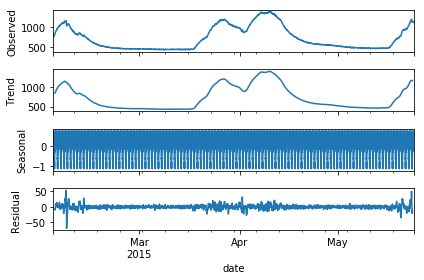

In [24]:
res=sm.tsa.seasonal_decompose(oc.CO2)
resplot=res.plot()

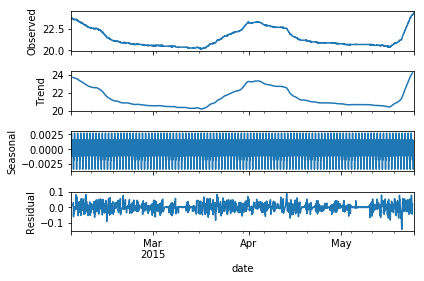

In [25]:
res=sm.tsa.seasonal_decompose(oc.Temperature)
resplot=res.plot()

In [26]:
from pandas.plotting import lag_plot


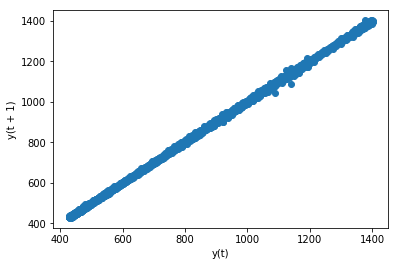

In [27]:
lag_plot(oc.CO2)

In [28]:
from statsmodels.tsa.ar_model import AR


In [108]:
train,test=oc.CO2[:-10],oc.CO2[-10:]

In [30]:
test

date
2015-05-24 04:00:00    1153.250000
2015-05-24 05:00:00    1152.400000
2015-05-24 06:00:00    1146.166667
2015-05-24 07:00:00    1145.400000
2015-05-24 08:00:00    1140.800000
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
2015-05-24 13:00:00    1124.000000
Freq: H, Name: CO2, dtype: float64

In [46]:
model =AR(oc.CO2)
model_fit=model.fit(maxlag=1) #here number of hours which our actual value are depending, if maxlag=2 so the temperature depends on 2h ago, if mawlag=3 so the temperature depends on 3h hours ago ....
predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)

In [47]:
model_fit.params #AR=auto regressive model

const     0.001078
L1.CO2    1.000195
dtype: float64

In [58]:
model_fit=model.fit(maxlag=3)
model_fit.params 

const     0.069790
L1.CO2    1.250047
L2.CO2   -0.201999
L3.CO2   -0.048016
dtype: float64

In [59]:
from statsmodels.tsa.ar_model import ARResults

In [60]:
ARResults(model,model_fit.params)

In [61]:
model_fit.pvalues

const     7.908817e-01
L1.CO2    0.000000e+00
L2.CO2    5.358033e-11
L3.CO2    1.315619e-02
dtype: float64

In [62]:
predictions2=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)
predictions2

date
2015-05-24 04:00:00    1153.606547
2015-05-24 05:00:00    1153.699521
2015-05-24 06:00:00    1152.329428
2015-05-24 07:00:00    1144.673157
2015-05-24 08:00:00    1145.014730
2015-05-24 09:00:00    1139.718682
2015-05-24 10:00:00    1152.497634
2015-05-24 11:00:00    1124.496129
2015-05-24 12:00:00    1124.044299
2015-05-24 13:00:00    1122.241708
Freq: H, dtype: float64

In [63]:
predictions

date
2015-05-24 04:00:00    1152.725379
2015-05-24 05:00:00    1153.475525
2015-05-24 06:00:00    1152.625359
2015-05-24 07:00:00    1146.390813
2015-05-24 08:00:00    1145.623997
2015-05-24 09:00:00    1141.023102
2015-05-24 10:00:00    1150.474941
2015-05-24 11:00:00    1129.420844
2015-05-24 12:00:00    1126.020182
2015-05-24 13:00:00    1123.219637
Freq: H, dtype: float64

In [64]:
test

date
2015-05-24 04:00:00    1153.250000
2015-05-24 05:00:00    1152.400000
2015-05-24 06:00:00    1146.166667
2015-05-24 07:00:00    1145.400000
2015-05-24 08:00:00    1140.800000
2015-05-24 09:00:00    1150.250000
2015-05-24 10:00:00    1129.200000
2015-05-24 11:00:00    1125.800000
2015-05-24 12:00:00    1123.000000
2015-05-24 13:00:00    1124.000000
Freq: H, Name: CO2, dtype: float64

In [65]:
comparison=pd.DataFrame({'Actual':test,'Pred_L1':predictions,'Pred_L3':predictions2})

In [66]:
comparison

,Actual,Pred_L1,Pred_L3
date,,,
2015-05-24 04:00:00,1153.250000,1152.725379,1153.606547
2015-05-24 05:00:00,1152.400000,1153.475525,1153.699521
2015-05-24 06:00:00,1146.166667,1152.625359,1152.329428
2015-05-24 07:00:00,1145.400000,1146.390813,1144.673157
2015-05-24 08:00:00,1140.800000,1145.623997,1145.014730
2015-05-24 09:00:00,1150.250000,1141.023102,1139.718682
2015-05-24 10:00:00,1129.200000,1150.474941,1152.497634
2015-05-24 11:00:00,1125.800000,1129.420844,1124.496129
2015-05-24 12:00:00,1123.000000,1126.020182,1124.044299


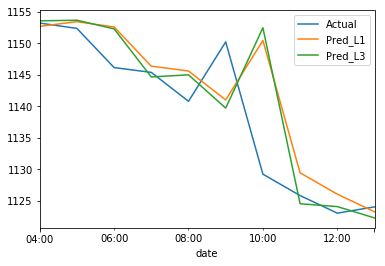

In [67]:
comparison.plot()

In [ ]:
# test for stationarity

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
res=adfuller(oc.CO2)
print(f"ADF STATS: {res[0]}")
print(f"p-value: {res[1]}")
print('Critical Values:')
for i,j in res[4].items():
    print(f"\t {i}: {j}")


ADF STATS: -2.7346843834134513
p-value: 0.06822624483241052
Critical Values:
	 1%: -3.4328313019591583
	 5%: -2.86263625123482
	 10%: -2.567353572714873


In [71]:
oc.CO2

date
2015-02-02 14:00:00     749.200000
2015-02-02 15:00:00     760.400000
2015-02-02 16:00:00     769.666667
2015-02-02 17:00:00     774.750000
2015-02-02 18:00:00     779.000000
2015-02-02 19:00:00     790.000000
2015-02-02 20:00:00     798.000000
2015-02-02 21:00:00     797.000000
2015-02-02 22:00:00     803.200000
2015-02-02 23:00:00     809.000000
2015-02-03 00:00:00     815.250000
2015-02-03 01:00:00     824.000000
2015-02-03 02:00:00     832.000000
2015-02-03 03:00:00     845.333333
2015-02-03 04:00:00     852.400000
2015-02-03 05:00:00     861.000000
2015-02-03 06:00:00     880.000000
2015-02-03 07:00:00     891.000000
2015-02-03 08:00:00     897.600000
2015-02-03 09:00:00     900.500000
2015-02-03 10:00:00     908.800000
2015-02-03 11:00:00     918.000000
2015-02-03 12:00:00     925.200000
2015-02-03 13:00:00     929.400000
2015-02-03 14:00:00     936.400000
2015-02-03 15:00:00     950.000000
2015-02-03 16:00:00     961.000000
2015-02-03 17:00:00     963.000000
2015-02-03 18:0

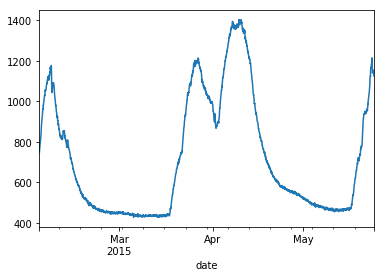

In [72]:
oc.CO2.plot()

In [77]:
yt_1=oc.CO2[:-1]
y_t= oc.CO2[1:]

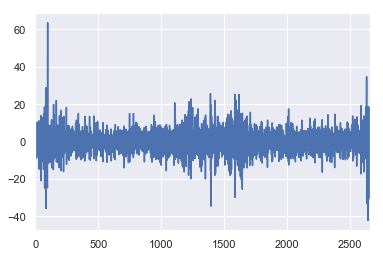

In [91]:
fd=(y_t.reset_index(drop=True)-yt_1.reset_index(drop=True))
fd.plot()

In [88]:
yt_1=fd[:-1]
y_t=fd[1:]

In [89]:
sd=(y_t.reset_index(drop=True)-yt_1.reset_index(drop=True))

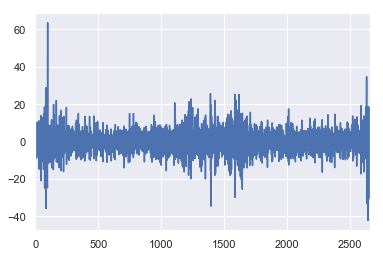

In [90]:
sd.plot()

In [92]:
mod=sm.tsa.statespace.SARIMAX(oc.CO2,order=(1,1,1))
res=mod.fit(disp=False)
print(res.summary)

<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x1c17f6d4e0>>


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:                    CO2   No. Observations:                 2654
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -7870.876
Date:                Thu, 20 Jun 2019   AIC                          15755.753
Time:                        14:18:51   BIC                          15796.929
Sample:                    02-02-2015   HQIC                         15770.658
                         - 05-24-2015                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Humidity       20.8883      1.164     17.938      0.000      18.606      23.171
Temperature     9.2550      3.818      2.424      0.015       1.771      16.739
ar.L1           0.4775      0.164      2.918    

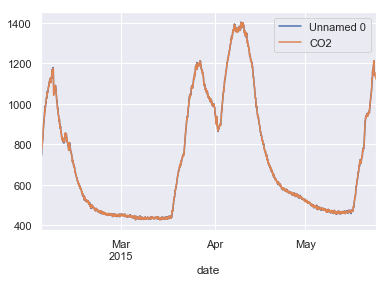

In [99]:
mod = sm.tsa.statespace.SARIMAX(train,order=(2,1,2),seasonal_order=(0,0,0,24),exog = oc[['Humidity','Temperature']][:-10],freq='H', enforce_stationarity=False, enforce_invertibility=False,)
res = mod.fit(disp=False)
print(res.summary())
pd.DataFrame([res.predict(),oc.CO2]).T.plot()


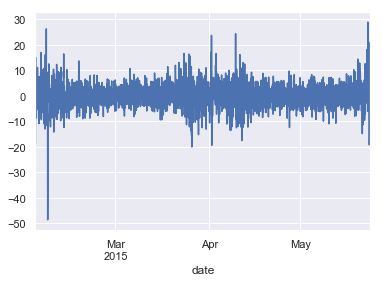

In [100]:
res.resid.plot()

                           Statespace Model Results                           
Dep. Variable:            Temperature   No. Observations:                 2654
Model:               SARIMAX(2, 1, 2)   Log Likelihood                6342.087
Date:                Thu, 20 Jun 2019   AIC                         -12672.174
Time:                        14:23:07   BIC                         -12636.880
Sample:                    02-02-2015   HQIC                        -12659.399
                         - 05-24-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Humidity       0.0577      0.005     12.427      0.000       0.049       0.067
ar.L1          0.9394      0.039     24.206      0.000       0.863       1.015
ar.L2          0.0526      0.039      1.354      0.1

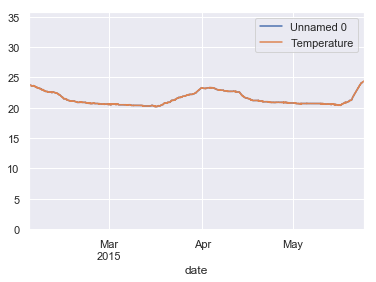

In [101]:
mod = sm.tsa.statespace.SARIMAX(oc.Temperature[:-10],order=(2,1,2),seasonal_order=(0,0,0,24),exog = oc[['Humidity']][:-10],freq='H', enforce_stationarity=False, enforce_invertibility=False,)
res = mod.fit(disp=False)
print(res.summary())
pd.DataFrame([res.predict(),oc.Temperature]).T.plot()


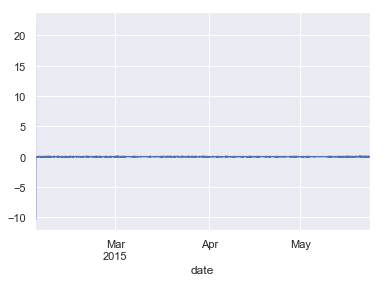

In [102]:
res.resid.plot()

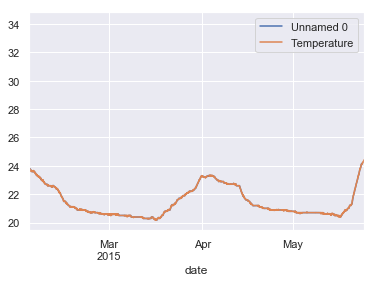

In [104]:
pd.DataFrame([res.predict()[1:],oc.Temperature[1:]]).T.plot()


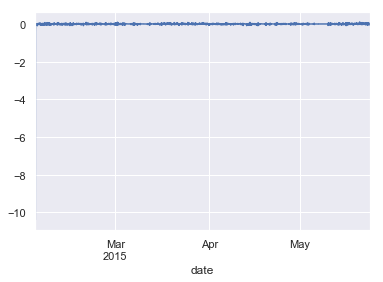

In [106]:
res.resid[1:].plot()

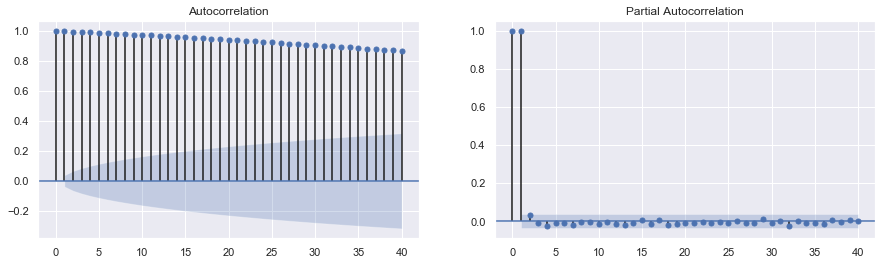

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(oc.iloc[1:]['Temperature'], lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(oc.iloc[1:]['Temperature'], lags=40, ax=axes[1])
